In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import apyori
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [4]:
# Importar dados do CSV
df_padaria = pd.read_csv("cesta_padaria.csv")
df_padaria.head()

C:\Users\gusta\AppData\Local\Temp\ipykernel_2256\3334274285.py:2: DtypeWarning: Columns (0,5,8,9,10,12,16,18,20,27,31,33,34,36,38,39,41,42,44,46,52,53,54,56,59,63,64,66,67,68,69,70,71,76,80,81,82,84,89,90,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_padaria = pd.read_csv("cesta_padaria.csv")


,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Tamanho da base de dados: ", df_padaria.shape)

Tamanho da base de dados:  (9465, 94)


In [7]:
# Análise exploratória inicial
itens = df_padaria.melt()['value'].dropna().sort_values()
print(f'Existem {itens.nunique()} produtos distintos na base de dados:\n', itens.unique())

Existem 94 produtos distintos na base de dados:
 ['adjustment' 'afternoon with the baker' 'alfajores' 'argentina night'
 'art tray' 'bacon' 'baguette' 'bakewell' 'bare popcorn' 'basket'
 'bowl nic pitt' 'bread' 'bread pudding' 'brioche and salami' 'brownie'
 'cake' 'caramel bites' 'cherry me dried fruit' 'chicken sand'
 'chicken stew' 'chimichurri oil' 'chocolates' 'christmas common' 'coffee'
 'coffee granules' 'coke' 'cookies' 'crepes' 'crisps'
 'drinking chocolate spoons' 'duck egg' 'dulce de leche' 'eggs'
 "ella's kitchen pouches" 'empanadas' 'extra salami or feta' 'fairy doors'
 'farm house' 'focaccia' 'frittata' 'fudge' 'gift voucher'
 'gingerbread syrup' 'granola' 'hack the stack' 'half slice monster'
 'hearty & seasonal' 'honey' 'hot chocolate' 'jam' 'jammie dodgers'
 'juice' 'keeping it local' 'kids biscuit' 'lemon and coconut' 'medialuna'
 'mighty protein' 'mineral water' 'mortimer' 'muesli' 'muffin'
 'my-5 fruit shoot' 'nomad bag' 'olum & polenta' 'panatone' 'pastry'
 'pick a

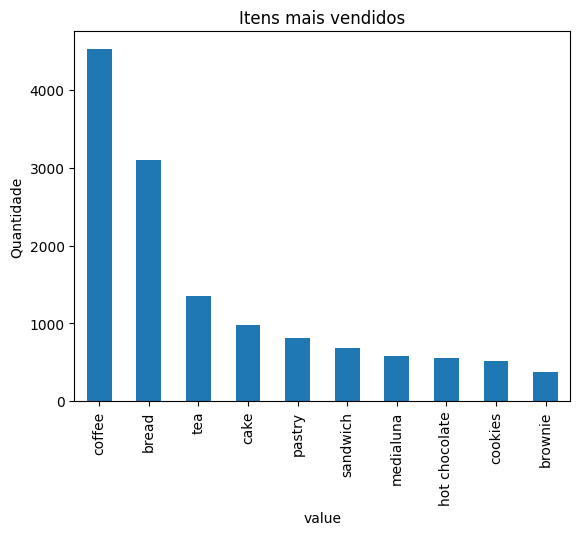

In [9]:
# Descobrir itens mais vendidos
qtde_itens = itens.value_counts()

ax = qtde_itens.nlargest(10).plot(kind='bar')
ax.set_title('Itens mais vendidos')
ax.set_ylabel('Quantidade')
plt.show()

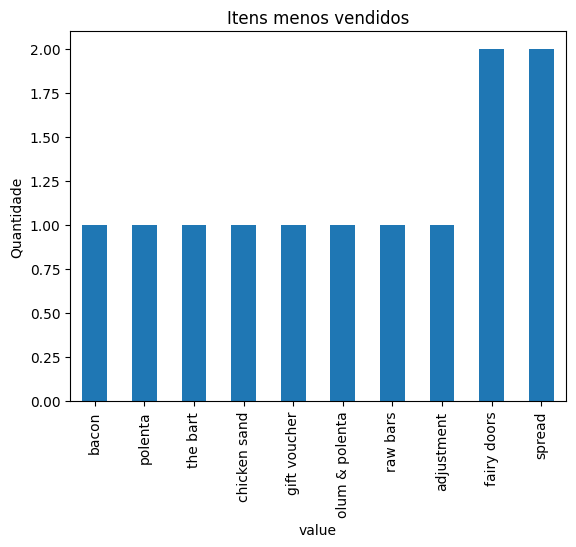

In [10]:
# Descobrir itens menos vendidos
ax = qtde_itens.nsmallest(10).plot(kind='bar')
ax.set_title('Itens menos vendidos')
ax.set_ylabel('Quantidade')
plt.show()

In [12]:
# Contar a quantidade de itens por compra (transação)
qtde_por_cesta = df_padaria.notna().apply(sum, axis=1)
qtde_por_cesta

0       1
1       1
2       3
3       1
4       3
       ..
9460    1
9461    4
9462    4
9463    2
9464    1
Length: 9465, dtype: int64

In [14]:
# No Apriori, é necessário haver ao menos 2 itens por transação, então é preciso eliminar as cestas com apenas 1 item
cestas = [set(linha.dropna()) for _, linha in df_padaria[qtde_por_cesta > 1].iterrows()]
cestas

[{'cookies', 'hot chocolate', 'jam'},
 {'bread', 'coffee', 'pastry'},
 {'medialuna', 'muffin', 'pastry'},
 {'coffee', 'medialuna', 'pastry', 'tea'},
 {'bread', 'pastry'},
 {'bread', 'muffin'},
 {'medialuna', 'scandinavian'},
 {'bread', 'medialuna'},
 {'coffee', 'jam', 'pastry', 'tartine', 'tea'},
 {'basket', 'bread', 'coffee'},
 {'bread', 'medialuna', 'pastry'},
 {'mineral water', 'scandinavian'},
 {'bread', 'coffee', 'medialuna'},
 {'bread', 'farm house'},
 {'bread', 'medialuna'},
 {'bread', 'coffee', 'medialuna'},
 {'muffin', 'scandinavian'},
 {'bread', 'coffee'},
 {'bread', 'jam'},
 {'muffin', 'scandinavian'},
 {'coffee', 'muffin'},
 {'muffin', 'scandinavian'},
 {'bread', 'tea'},
 {'bread', 'coffee'},
 {'bread', 'tea'},
 {'coffee', 'juice', 'muffin', 'tartine'},
 {'bread', 'tea'},
 {'fudge', 'scandinavian'},
 {'coffee', 'medialuna'},
 {'coffee', 'hot chocolate', 'medialuna'},
 {'bread', "ella's kitchen pouches", 'jam', 'juice', 'muffin'},
 {'coffee', 'medialuna'},
 {'bread', 'victor

In [15]:
print(f'Existem {len(cestas)} cestas de compras com 2 ou mais itens')

Existem 5517 cestas de compras com 2 ou mais itens


In [21]:
# Iniciar o algoritmo Apriori
minsup = 0.04
minconf = 0.4
regras_associacao = apyori.apriori(cestas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
    itens = list(regra.items)
    print(
      f"{itens[:-1]} --> [{itens[-1]}]  Suporte: {regra.support:.3f}"
      f"  Confiança: {regra.ordered_statistics[0].confidence:.3f}"
      )

[] --> [coffee]  Suporte: 0.604  Confiança: 0.604
['bread'] --> [coffee]  Suporte: 0.154  Confiança: 0.447
['coffee'] --> [cake]  Suporte: 0.094  Confiança: 0.586
['coffee'] --> [cookies]  Suporte: 0.048  Confiança: 0.568
['hot chocolate'] --> [coffee]  Suporte: 0.051  Confiança: 0.580
['medialuna'] --> [coffee]  Suporte: 0.060  Confiança: 0.631
['coffee'] --> [pastry]  Suporte: 0.082  Confiança: 0.600
['sandwich'] --> [coffee]  Suporte: 0.066  Confiança: 0.591
['tea'] --> [coffee]  Suporte: 0.086  Confiança: 0.412
['coffee'] --> [toast]  Suporte: 0.041  Confiança: 0.737


In [24]:
# Importar biblioteca de FPGrowth
import pyfpgrowth

In [30]:
patterns = pyfpgrowth.find_frequent_patterns(cestas, 3)
patterns

{('caramel bites',): 3,
 ('panatone',): 3,
 ('brioche and salami',): 3,
 ('raspberry shortbread sandwich',): 3,
 ("valentine's card",): 3,
 ('cherry me dried fruit',): 3,
 ('bread pudding',): 4,
 ('bread pudding', 'coffee'): 4,
 ('bare popcorn',): 4,
 ('bare popcorn', 'coffee'): 3,
 ('argentina night',): 4,
 ('half slice monster',): 4,
 ('basket',): 5,
 ('basket', 'coffee'): 4,
 ('honey',): 5,
 ('bread', 'muesli'): 3,
 ('coffee', 'muesli'): 3,
 ('coffee granules',): 5,
 ('christmas common',): 5,
 ('bread', 'christmas common'): 3,
 ('victorian sponge',): 6,
 ('tea', 'victorian sponge'): 4,
 ('bread', 'lemon and coconut'): 3,
 ('coffee', 'lemon and coconut'): 4,
 ('crepes',): 6,
 ('vegan feast',): 6,
 ('bread', 'empanadas'): 3,
 ('coffee', 'empanadas'): 4,
 ('gingerbread syrup',): 7,
 ('postcard',): 7,
 ('postcard', 'tshirt'): 6,
 ('coffee', 'nomad bag'): 4,
 ('bread', 'coffee', 'nomad bag'): 3,
 ('bread', 'nomad bag'): 6,
 ('coffee', 'drinking chocolate spoons'): 5,
 ('bread', 'coffee',

In [31]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.4)
rules

{('bread pudding',): (('coffee',), 1.0),
 ('bare popcorn',): (('coffee',), 0.75),
 ('basket',): (('coffee',), 0.8),
 ('christmas common',): (('bread',), 0.6),
 ('victorian sponge',): (('tea',), 0.6666666666666666),
 ('postcard',): (('tshirt',), 0.8571428571428571),
 ('tshirt',): (('postcard',), 0.5454545454545454),
 ('bread', 'nomad bag'): (('coffee',), 0.5),
 ('coffee', 'nomad bag'): (('bread',), 0.75),
 ('bread', 'drinking chocolate spoons'): (('coffee',), 0.6),
 ('coffee', 'drinking chocolate spoons'): (('bread',), 0.6),
 ('chocolates', 'coffee'): (('juice',), 0.6),
 ('chocolates', 'juice'): (('hot chocolate',), 0.75),
 ('chocolates', 'hot chocolate'): (('juice',), 0.75),
 ('coffee', 'pick and mix bowls'): (('tartine',), 0.5),
 ('pick and mix bowls', 'tartine'): (('coffee',), 1.0),
 ('juice', 'pick and mix bowls'): (('mineral water',), 0.75),
 ('mineral water', 'pick and mix bowls'): (('juice',), 1.0),
 ('crisps', 'hot chocolate'): (('coffee',), 1.0),
 ('crisps', 'juice'): (('coffee

In [32]:
# Importar base de dados de market-basket-optimisation.csv
df_mercado = pd.read_csv("market-basket-optimisation.csv", header=None)
df_mercado.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
len(df_mercado)

7501

In [34]:
# remover espaços em branco (strip)
for index in df_mercado.columns:
    df_mercado[index] = df_mercado[index].str.strip()

In [37]:
itens = df_mercado.melt()['value'].dropna().sort_values()
print(f'Existem {itens.nunique()} produtos distintos na base de dados:\n', itens.unique())	

Existem 119 produtos distintos na base de dados:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint gre

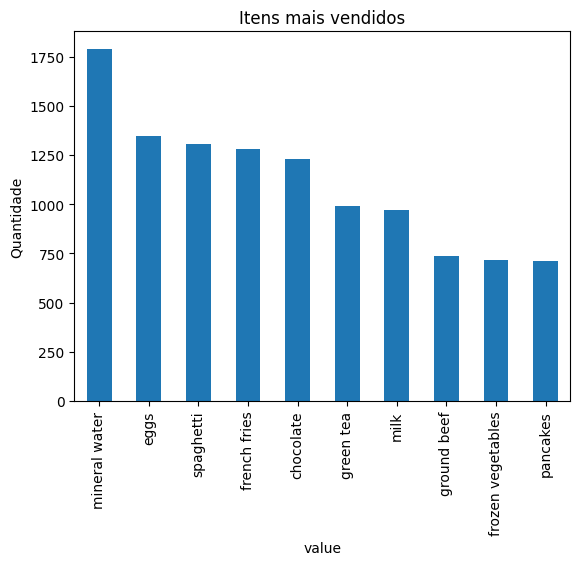

In [38]:
qtde_itens = itens.value_counts()

barra = qtde_itens.nlargest(10).plot(kind='bar')
barra.set_title('Itens mais vendidos')
barra.set_ylabel('Quantidade')
plt.show()

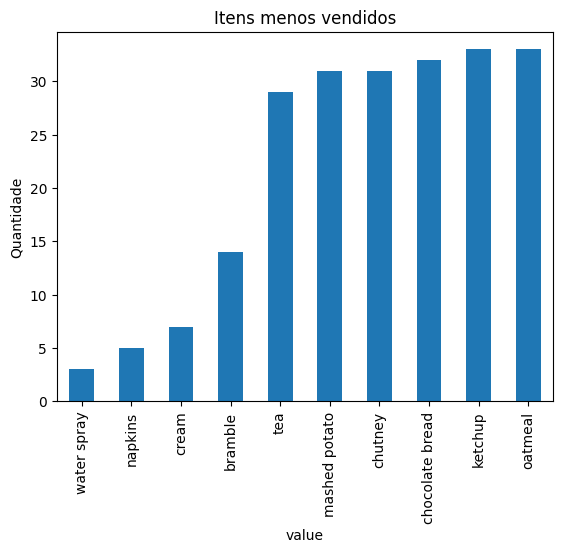

In [39]:
barra = qtde_itens.nsmallest(10).plot(kind='bar')
barra.set_title('Itens menos vendidos')
barra.set_ylabel('Quantidade')
plt.show()

In [40]:
qtde_por_cesta = df_mercado.notna().apply(sum, axis=1)
qtde_por_cesta

0       20
1        3
2        1
3        2
4        5
        ..
7496     3
7497     6
7498     1
7499     2
7500     4
Length: 7501, dtype: int64

In [41]:
cestas = [set(linha.dropna()) for _, linha in df_mercado[qtde_por_cesta > 1].iterrows()]
cestas

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'},
 {'light cream', 'shallot', 'soup'},
 {'frozen vegetables', 'green tea', 'spaghetti'},
 {'eggs', 'pet food'},
 {'burgers', 'cooking oil', 'eggs', 'mineral water', 'turkey'},
 {'champagne', 'cookies', 'spaghetti'},
 {'mineral water', 'salmon'},
 {'chicken',
  'chocolate',
  'cooking oil',
  'honey',
  'low fat yogurt',
  'oil',
  'shrimp'},
 {'eggs', 'turkey'},
 {'black tea',
  'chicken',
  'eggs',
  'extra dark chocolate',
  'fresh tuna',
  'mineral water',
  'salmon',
  'spaghetti',
  'tomatoes'

In [42]:
len(cestas)

5747

In [43]:
minsup = 0.04
minconf = 0.3

regras_associacao = apyori.apriori(cestas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
    itens = list(regra.items)
    print(
      f"{itens[:-1]} --> [{itens[-1]}]  Suporte: {regra.support:.3f}"
      f"  Confiança: {regra.ordered_statistics[0].confidence:.3f}"
      )

['mineral water'] --> [chocolate]  Suporte: 0.069  Confiança: 0.342
['eggs'] --> [mineral water]  Suporte: 0.066  Confiança: 0.304
['mineral water'] --> [frozen vegetables]  Suporte: 0.047  Confiança: 0.385
['mineral water'] --> [ground beef]  Suporte: 0.053  Confiança: 0.429
['ground beef'] --> [spaghetti]  Suporte: 0.051  Confiança: 0.411
['milk'] --> [mineral water]  Suporte: 0.063  Confiança: 0.383
['mineral water'] --> [pancakes]  Suporte: 0.044  Confiança: 0.375
['mineral water'] --> [spaghetti]  Suporte: 0.078  Confiança: 0.357
